In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [128]:
beeps = pd.read_csv(beeps[0])

In [129]:
beeps = beeps[(~beeps['ppsk'].isna()) & (beeps['ppsk'] != 'MISSING')]
beeps.drop('count', axis=1, inplace=True)
beeps['Month'] = beeps['Timestamp'].str.split('/',expand=True)[0]
beeps['Day'] = beeps['Timestamp'].str.split(" ", expand=True)[0].str.rsplit('/', n=1, expand=True)[0]
beeps['Year'] = beeps['Timestamp'].str.split(" ", expand=True)[0].str.rsplit('/', n=1, expand=True)[1]
beeps['Time'] = beeps['Timestamp'].str.split(" ", expand=True)[1]
beeps['Day'] = beeps['Day'].str.split('/',expand=True)[1]


In [130]:
beeps['ppsk'] = beeps['ppsk'].astype(int)
beeps['Day'] = beeps['Day'].astype(int)
beeps['Year'] = beeps['Year'].astype(int)
beeps['Month'] = beeps['Month'].astype(int)
beeps = beeps.sort_values(by=['Year', 'Month', 'Day', 'Time'])

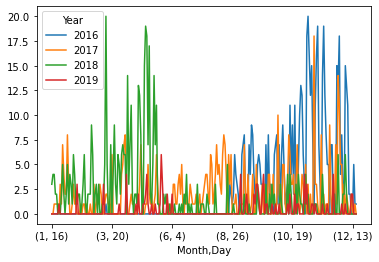

In [131]:
beeps.groupby(['Month','Day','Year']).count().unstack()['ppsk'].fillna(0).plot(kind='line')

In [132]:
beeps[:]

,ppsk,Timestamp,Month,Day,Year,Time
33,1171276,3/15/2016 16:01,3,15,2016,16:01
1773,2642796,8/24/2016 11:10,8,24,2016,11:10
1774,2642796,8/24/2016 12:24,8,24,2016,12:24
1198,2639782,8/24/2016 18:42,8,24,2016,18:42
34,1029375,8/25/2016 14:49,8,25,2016,14:49
...,...,...,...,...,...,...
1503,2639782,12/5/2019 12:35,12,5,2019,12:35
1504,2639782,12/12/2019 10:54,12,12,2019,10:54
1505,2639782,12/12/2019 11:53,12,12,2019,11:53
1506,2639782,12/13/2019 10:56,12,13,2019,10:56


In [133]:
test = beeps[:]
test['Count'] = test.groupby('ppsk')['Month'].transform('size')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [134]:
test = test.groupby('ppsk').first()

In [135]:
top5 = test.sort_values(by='Count', ascending=False).head().index
jacobs_ethnicities[jacobs_ethnicities['ppsk'].isin(top5)]

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,Ethnicity,gender
198,2016 Spring,2639782,Undergraduate,Engineering Science,Design Innovation,90,Primary,3,18412,18412.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,3.0,Asian/Pacific Islander,Female
142,2016 Fall,2639782,Undergraduate,Engineering Science,Design Innovation,22,Primary,1,33443,33443.0,Prototype & Fab,A,Letter Grade,A+,4.0,3.0,Asian/Pacific Islander,Female
285,2016 Fall,2630450,Undergraduate,Engineering Science,Design Innovation,22,Primary,1,33443,33443.0,Prototype & Fab,A,Letter Grade,A-,3.7,3.0,International,Female
697,2017 Spring,2630450,Undergraduate,Engineering Science,Design Innovation,15,Primary,1,33080,33080.0,Design Methodology,A,Letter Grade,A,4.0,3.0,International,Female
791,2017 Spring,2630450,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,33910,847.0,Spec Topics Des Inv,A,Letter Grade,A-,3.7,3.0,International,Female
735,2017 Fall,2630450,Undergraduate,Engineering Science,Design Innovation,21,Primary,1,42555,42555.0,Vis Comm & Sketch,A,Letter Grade,A,4.0,3.0,International,Female
1706,2018 Spring,2757766,Undergraduate,Design Innovation,Design Innovation,190,Primary,2,15543,1204.0,Spec Topics Des Inv,A,Letter Grade,A+,4.0,3.0,White/Other,Male


In [136]:
jacobs_ethnicities

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,Ethnicity,gender
8,2015 Spring,1030081,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Female
10,2015 Spring,1031223,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Female
13,2015 Spring,1032550,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Male
14,2015 Spring,1032733,Undergraduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Male
17,2015 Spring,1171276,Undergraduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,2019 Fall,2739108,Undergraduate,Design Innovation,Design Innovation,10,Primary,1,32998,32998.0,Discovering Design,A,Letter Grade,A-,3.7,2.0,White/Other,Female
1873,2019 Fall,2739284,Undergraduate,Design Innovation,Design Innovation,10,Primary,1,32998,32998.0,Discovering Design,A,Letter Grade,A,4.0,2.0,White/Other,Female
1876,2019 Fall,2741518,Undergraduate,Design Innovation,Design Innovation,22,Primary,1,28116,28116.0,Prototype & Fab,A,Letter Grade,A+,4.0,3.0,White/Other,Female
1877,2019 Fall,2741518,Undergraduate,Design Innovation,Design Innovation,190,Primary,1,15094,1721.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,3.0,White/Other,Female


In [137]:
jacobs = jacobs[jacobs['ppsk'] != 'MISSING']
jacobs['ppsk'] = jacobs['ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [138]:
full_jacobs = jacobs.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='left')

In [139]:
cleaned_jacobs = full_jacobs[~full_jacobs.isnull().any(axis=1)]

In [140]:
cleaned_jacobs.merge(beeps,on='ppsk')

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,ethnic.l1,gender,Timestamp,Month,Day,Year,Time
0,1171276,2015,Fall,N,Y,Y,Asian/Pacific Islander,Female,3/15/2016 16:01,3,15,2016,16:01
1,1171276,2016,Spring,Y,Y,Y,Asian/Pacific Islander,Female,3/15/2016 16:01,3,15,2016,16:01
2,1478479,2015,Fall,N,Y,Y,Asian/Pacific Islander,Male,9/19/2016 9:27,9,19,2016,9:27
3,1478479,2015,Fall,N,Y,Y,Asian/Pacific Islander,Male,9/22/2016 10:06,9,22,2016,10:06
4,1478479,2015,Fall,N,Y,Y,Asian/Pacific Islander,Male,9/23/2016 15:37,9,23,2016,15:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,2761110,2018,Spring,N,Y,Y,Asian/Pacific Islander,Male,4/27/2018 13:38,4,27,2018,13:38
7501,2761110,2018,Spring,N,Y,Y,Asian/Pacific Islander,Male,4/27/2018 16:32,4,27,2018,16:32
7502,2761110,2018,Spring,N,Y,Y,Asian/Pacific Islander,Male,4/27/2018 9:07,4,27,2018,9:07
7503,2761110,2018,Spring,N,Y,Y,Asian/Pacific Islander,Male,4/29/2018 14:05,4,29,2018,14:05


In [141]:
# ask Andrew why there would be duplicated students in Jacob's data
#maker_passes[maker_passes.duplicated(subset='ppsk',keep='first')].merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='inner')[['ppsk','ethnic.l1','gender']].groupby(['ethnic.l1', 'gender']).count().unstack()['ppsk'].plot(kind='bar')

In [142]:
pass_entries = cleaned_jacobs.merge(beeps, on='ppsk')

In [143]:
#pass_entries['Maker Pass Holders'].value_counts()

In [144]:
pass_entries.sort_values(by='Day').groupby(['ethnic.l1', 'Day'], sort=False).count().unstack()['ppsk']#.plot(kind='bar')

Day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
ethnic.l1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
International,156.0,70.0,144.0,46.0,76.0,82.0,132.0,96.0,22.0,18.0,34.0,60.0,34.0,32.0,146.0,40.0,54.0,54.0,42.0,88.0,18.0,96.0,38.0,12.0,72.0,106.0,52.0,22.0,54.0,24.0,18.0
White/Other,73.0,76.0,28.0,45.0,20.0,65.0,33.0,85.0,84.0,35.0,45.0,29.0,33.0,44.0,83.0,43.0,34.0,55.0,64.0,39.0,68.0,54.0,73.0,82.0,89.0,35.0,65.0,55.0,24.0,35.0,33.0
Asian/Pacific Islander,122.0,122.0,56.0,127.0,219.0,206.0,175.0,64.0,112.0,70.0,73.0,108.0,76.0,108.0,96.0,93.0,94.0,106.0,156.0,125.0,67.0,44.0,103.0,116.0,138.0,111.0,107.0,109.0,181.0,180.0,84.0
Underrepresented Minority,28.0,24.0,22.0,10.0,8.0,8.0,18.0,NaN,3.0,NaN,NaN,6.0,5.0,6.0,9.0,5.0,41.0,4.0,15.0,33.0,11.0,19.0,NaN,24.0,22.0,14.0,11.0,23.0,19.0,5.0,NaN


In [145]:
# ppsks of everyone who (in data) uses Jacobs for something
ppsks = maker_passes['ppsk']
ppsks = ppsks.append(jacobs_ethnicities['ppsk']).unique()

# all Jacobs students' academic career, either with DESINV course or MakerPass
all_jacobs = student_courses[student_courses['ppsk'].isin(ppsks)]

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [157]:
maker_passes.groupby(['year','term']).count()[['DES INV Students']].sum(axis=1)

year  term  
2015  Fall       735
2016  Fall      1348
      Spring     964
2017  Fall      1307
      Spring    1407
2018  Fall      1206
      Spring    1368
2019  Fall      1463
      Spring    1569
2020  Fall       754
      Spring    1697
dtype: int64

In [31]:
checking = maker_passes.merge(student_courses, on='ppsk', how='left')

In [32]:
checking['DES INV Students'] = checking['DES INV Students'].astype(str) 

In [33]:
checking[checking['DES INV Students'] == 'Y']

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,year.name,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
0,724096,2015,Fall,Y,Y,Y,2007 Fall,Undergraduate,Business,Business Admin-Undergrad,103,Primary,1,8553,8553.0,Intro To Finance,Jonathan Berk,A,Letter Grade,A+,4.0,4.0
1,724096,2015,Fall,Y,Y,Y,2007 Fall,Undergraduate,Psychology,Psychology,141,Primary,1,74426,74426.0,Devel Dur Infancy,Joseph Campos,A,Letter Grade,A+,4.0,3.0
2,724096,2015,Fall,Y,Y,Y,2007 Fall,Undergraduate,Psychology,Psychology,150,Primary,1,74453,74453.0,Personality Psych,Meg Jay,A,Letter Grade,A+,4.0,3.0
3,724096,2015,Fall,Y,Y,Y,2007 Fall,Undergraduate,Psychology,Psychology,130,Primary,1,74360,74360.0,Clinical Psychology,Robert Levenson,A,Letter Grade,A,4.0,3.0
4,724096,2015,Fall,Y,Y,Y,2007 Summer,Undergraduate,Business,Business Admin-Undergrad,100,Primary,9,20045,20045.0,Business Comm,Arturo Perez-Reyes,A,Letter Grade,A-,3.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552379,4348181,2020,Fall,Y,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552404,4356250,2020,Fall,Y,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552406,4357716,2020,Fall,Y,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552415,4362319,2020,Fall,Y,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
all_jacobs

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
3183,2007 Fall,724096,Undergraduate,Business,Business Admin-Undergrad,103,Primary,1,8553,8553.0,Intro To Finance,Jonathan Berk,A,Letter Grade,A+,4.0,4.0
3184,2007 Fall,724096,Undergraduate,Psychology,Psychology,141,Primary,1,74426,74426.0,Devel Dur Infancy,Joseph Campos,A,Letter Grade,A+,4.0,3.0
3185,2007 Fall,724096,Undergraduate,Psychology,Psychology,150,Primary,1,74453,74453.0,Personality Psych,Meg Jay,A,Letter Grade,A+,4.0,3.0
4065,2007 Fall,765357,Undergraduate,Integrative Biology,Integrative Biology,88,Primary,1,43020,43020.0,Leaders Bio Scholar,Alissa Myrick; Katherine Kim; Tyrone Hayes,A,Letter Grade,A+,4.0,1.0
8987,2007 Summer,713359,Undergraduate,Electrical Eng & Computer Sci,Electrical Engineering,100,Primary,1,37285,200007.0,Elec Tech For Eng,Bharathwaj Muthuswamy; Jean Walrand,A,Letter Grade,A,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22126,2019 Summer,4264306,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,14720,25.0,Foundation Data Sci,NaN,A,Letter Grade,A,4.0,4.0
22531,2019 Summer,4265730,Undergraduate,Electrical Eng & Computer Sci,Computer Science,61A,Primary,1,14622,14622.0,Str Interp Cmp Prgs,NaN,A,Letter Grade,A,4.0,4.0
22572,2019 Summer,4265873,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,NaN,B,Letter Grade,B,3.0,2.0
22573,2019 Summer,4265873,Undergraduate,Gender & Womens Studies,Gender & Womens Studies,111,Primary,2,14306,14306.0,Special Topics,NaN,A,Letter Grade,A,4.0,4.0


In [35]:
all_jacobs = all_jacobs.groupby(['ppsk','year.name']).filter(lambda x: (x['course.subject'].isin(['Design Innovation']).any())) 
#single_students = all_jacobs.groupby('ppsk')

In [36]:
#get ppsks of students from jacobs and find other classes they take
# how many units students take
#all_jacobs = student_courses
all_jacobs

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
181,2015 Spring,723198,Graduate,Public Policy,Public Policy,205,Primary,6,77337,100998.0,Adv Pol Anal,Jennifer Granholm,A,Letter Grade,A+,4.0,6.0
182,2015 Spring,723198,Graduate,Public Policy,Public Policy,299,Independent Study,6,77571,100998.0,Ind Stdy Mst Essay,Jennifer Granholm,A,Letter Grade,A+,4.0,3.0
834,2015 Spring,1029128,Undergraduate,Ag & Resource Econ & Pol,Environ Econ & Policy,143,Primary,1,1278,1278.0,Econ Of Innovation,Brian Wright,A,Letter Grade,A+,4.0,3.0
1159,2015 Spring,1031223,Undergraduate,Geography,Geography,164,Primary,1,36338,36338.0,Geog Of China,You-Tien Hsing,A,Letter Grade,A+,4.0,4.0
1163,2015 Spring,1031253,Undergraduate,Psychology,Psychology,C162,Primary,1,74176,208279.0,Human Happiness,Dacher Keltner,A,Letter Grade,A+,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22125,2019 Summer,4264306,Undergraduate,Design Innovation,Design Innovation,190,Primary,8,15779,15779.0,Spec Topics Des Inv,NaN,A,Letter Grade,A+,4.0,3.0
22126,2019 Summer,4264306,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,14720,25.0,Foundation Data Sci,NaN,A,Letter Grade,A,4.0,4.0
22572,2019 Summer,4265873,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,NaN,B,Letter Grade,B,3.0,2.0
22573,2019 Summer,4265873,Undergraduate,Gender & Womens Studies,Gender & Womens Studies,111,Primary,2,14306,14306.0,Special Topics,NaN,A,Letter Grade,A,4.0,4.0
